Tugas Akhir Pariwisata 

Nama : Azhar As Rahmatulloh 
Nim  : 190411100157 

In [ ]:
#Mengoupload File ke dalam google colabs
from google.colab import files


uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

tv = TfidfVectorizer(max_features=5000)
stem = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

In [ ]:
data_tourism_rating = pd.read_csv('tourism_rating.csv')
data_tourism_with_id = pd.read_csv('tourism_with_id.csv')
data_user = pd.read_csv('user.csv')

In [ ]:
data_tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
data_tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
data_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
data_tourism_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
data_tourism_with_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
data_user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [ ]:
data_tourism_with_id.drop(['Rating','Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
data_tourism_with_id

,Place_Id,Place_Name,Description,Category,City,Price
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


In [ ]:
data_rekomendasi = pd.merge(data_tourism_rating.groupby('Place_Id')['Place_Ratings'].mean(),data_tourism_with_id,on='Place_Id')
data_rekomendasi

,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...,...
432,433,3.304348,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,2.400000,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,3.000000,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,3.090909,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


In [ ]:
def preprocessing(data):
    data = data.lower()
    data = stem.stem(data)
    data = stopword.remove(data)
    return data

In [ ]:
data_content_based_filtering = data_rekomendasi.copy()
data_content_based_filtering['Tags'] = data_content_based_filtering['Description'] + ' ' + data_content_based_filtering['Category']
data_content_based_filtering.drop(['Price','Place_Ratings','Description','Category'],axis=1,inplace=True)
data_content_based_filtering

,Place_Id,Place_Name,City,Tags
0,1,Monumen Nasional,Jakarta,Monumen Nasional atau yang populer disingkat d...
1,2,Kota Tua,Jakarta,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
2,3,Dunia Fantasi,Jakarta,Dunia Fantasi atau disebut juga Dufan adalah t...
3,4,Taman Mini Indonesia Indah (TMII),Jakarta,Taman Mini Indonesia Indah merupakan suatu kaw...
4,5,Atlantis Water Adventure,Jakarta,Atlantis Water Adventure atau dikenal dengan A...
...,...,...,...,...
432,433,Museum Mpu Tantular,Surabaya,Museum Negeri Mpu Tantular adalah sebuah museu...
433,434,Taman Bungkul,Surabaya,Taman Bungkul adalah taman wisata kota yang te...
434,435,Taman Air Mancur Menari Kenjeran,Surabaya,Air mancur menari atau dancing fountain juga a...
435,436,Taman Flora Bratang Surabaya,Surabaya,Taman Flora adalah salah satu taman kota di Su...


In [ ]:
data_content_based_filtering.Tags = data_content_based_filtering.Tags.apply(preprocessing)
data_content_based_filtering

,Place_Id,Place_Name,City,Tags
0,1,Monumen Nasional,Jakarta,monumen nasional populer singkat monas tugu mo...
1,2,Kota Tua,Jakarta,kota tua jakarta juga nama kota tua pusat alun...
2,3,Dunia Fantasi,Jakarta,dunia fantasi sebut dufan tempat hibur letak k...
3,4,Taman Mini Indonesia Indah (TMII),Jakarta,taman mini indonesia indah rupa suatu kawasan ...
4,5,Atlantis Water Adventure,Jakarta,atlantis water adventure kenal atlantis ancol ...
...,...,...,...,...
432,433,Museum Mpu Tantular,Surabaya,museum negeri mpu tantular buah museum negeri ...
433,434,Taman Bungkul,Surabaya,taman bungkul taman wisata kota letak pusat ko...
434,435,Taman Air Mancur Menari Kenjeran,Surabaya,air mancur tari dancing fountain ada kawasan j...
435,436,Taman Flora Bratang Surabaya,Surabaya,taman flora salah satu taman kota surabaya rup...


In [ ]:
vectors = tv.fit_transform(data_content_based_filtering.Tags).toarray()
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
similarity = cosine_similarity(vectors)
similarity[0][1:10]

array([0.04510993, 0.07188361, 0.02807929, 0.00479488, 0.01497397,
       0.02458836, 0.00394491, 0.01975822, 0.01633207])

In [ ]:
def recommend_by_content_based_filtering(nama_tempat):
    nama_tempat_index = data_content_based_filtering[data_content_based_filtering['City']==nama_tempat].index[0]
    distancess = similarity[nama_tempat_index]
    nama_tempat_list = sorted(list(enumerate(distancess)),key=lambda x: x[1],reverse=True)[1:20]
    
    recommended_nama_tempats = []
    for i in nama_tempat_list:
        recommended_nama_tempats.append(([data_content_based_filtering.iloc[i[0]].Place_Name]+[i[1]]))
        
    return recommended_nama_tempats

In [ ]:
recommend_by_content_based_filtering('Jakarta')

[['Monumen Bandung Lautan Api', 0.28683907306335177],
 ['Monumen Selamat Datang', 0.2661577967639709],
 ['Monumen Perjuangan Rakyat Jawa Barat', 0.25729692362006246],
 ['Tugu Muda Semarang', 0.22491138935052768],
 ['Monumen Bambu Runcing Surabaya', 0.20482652874129093],
 ['Monumen Tugu Pahlawan', 0.18791275217429565],
 ['Monumen Sanapati', 0.1795335499410377],
 ['Monumen Yogya Kembali', 0.17871073001225599],
 ['Monumen Palagan Ambarawa', 0.16871094841229334],
 ['Tugu Pal Putih Jogja', 0.16458939276128548],
 ['Monumen Jalesveva Jayamahe', 0.16298122702145004],
 ['Monumen Serangan Umum 1 Maret', 0.1495446282755392],
 ['Museum Geologi Bandung', 0.14332908682630133],
 ['Masjid Istiqlal', 0.14316626757145734],
 ['Taman Lapangan Banteng', 0.13574650563780177],
 ['Monumen Batik Yogyakarta', 0.13212389881566858],
 ['Galeri Nasional Indonesia', 0.1188783403001163],
 ['Museum Nasional', 0.11476668908336699],
 ['Lawang Sewu', 0.11035398166335471]]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np  

In [ ]:
hasil_rekomendasi= recommend_by_content_based_filtering('Jakarta')

In [ ]:
hasil_rekomendasi = np.array([
    ['Monumen Bandung Lautan Api', 0.28683907306335177],
    ['Monumen Selamat Datang', 0.2661577967639709],
    ['Monumen Perjuangan Rakyat Jawa Barat', 0.25729692362006246],
    ['Tugu Muda Semarang', 0.22491138935052768],
    ['Monumen Bambu Runcing Surabaya', 0.20482652874129093],
    ['Monumen Tugu Pahlawan', 0.18791275217429565],
    ['Monumen Sanapati', 0.1795335499410377],
    ['Monumen Yogya Kembali', 0.17871073001225599],
    ['Monumen Palagan Ambarawa', 0.16871094841229334],
    ['Tugu Pal Putih Jogja', 0.16458939276128548],
    ['Monumen Jalesveva Jayamahe', 0.16298122702145004],
    ['Monumen Serangan Umum 1 Maret', 0.1495446282755392],
    ['Museum Geologi Bandung', 0.14332908682630133],
    ['Masjid Istiqlal', 0.14316626757145734],
    ['Taman Lapangan Banteng', 0.13574650563780177],
    ['Monumen Batik Yogyakarta', 0.13212389881566858],
    ['Galeri Nasional Indonesia', 0.1188783403001163],
    ['Museum Nasional', 0.11476668908336699],
    ['Lawang Sewu', 0.11035398166335471]
])

In [ ]:
features = hasil_rekomendasi[:, 1].astype(float)

In [ ]:
features = features.reshape(-1, 1)

In [ ]:
num_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
clustered_hasil_rekomendasi = []
for i, item in enumerate(hasil_rekomendasi):
    item_cluster = cluster_labels[i]
    clustered_hasil_rekomendasi.append([item[0], item_cluster])

In [ ]:
temp = []
for item in clustered_hasil_rekomendasi:
    temp.append(item)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hasil_cluster = np.array(temp)

In [ ]:
features = hasil_rekomendasi[:, 1].astype(float)

features = features.reshape(-1, 1)

k_values = range(1, len(hasil_rekomendasi) + 1)
inertia_values = []

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

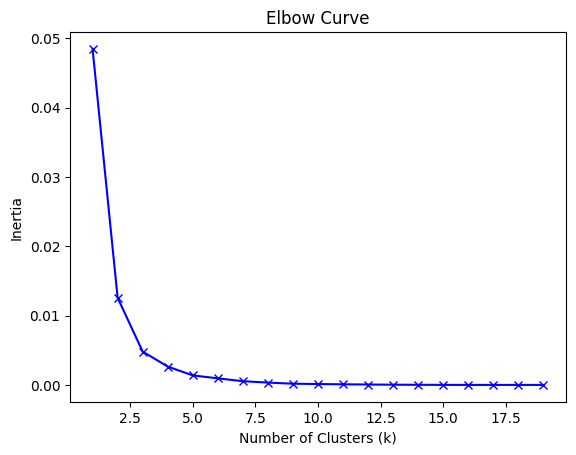

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(list(k_values), inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()